<a href="https://colab.research.google.com/github/AliConda/AliConda/blob/main/Model_1__IZO_ANN_peak_area_ratio_fraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#df=pd.read_excel('Integral_of_peaks_comparison_IZO_only.xlsx')  the 3mbar with its 21 ohm sq was worng so now removed
df=pd.read_excel('Integral_of_peaks_comparison_IZO_only_3mbarcutout.xlsx')

In [ ]:
df.head(2)

,A,B,C,D,E,F,G,H,I,J,K,L,Pres,Sheet,Sample,ID,Unnamed: 16,sum,Unnamed: 18,A.1,B.1,C.1,D.1,E.1,F.1,G.1,H.1,I.1,J.1,K.1,L.1,Sheet.1
0,743.8543,340.2103,2926.237,1384.301,768.4669,1008.149,861.4096,1002.9320,1570.475,2182.261,3235.216,115.4485,1.0,13.5,IZO,1,NaN,16138.9606,NaN,0.046091,0.021080,0.181315,0.085774,0.047616,0.062467,0.053375,0.062144,0.097310,0.135217,0.200460,0.007153,13.5
1,741.7682,335.8525,2929.873,1375.218,768.2396,1002.382,860.3216,990.2999,1558.786,2181.261,3227.857,113.7976,1.0,13.5,IZO,1,NaN,16085.6564,NaN,0.046114,0.020879,0.182142,0.085493,0.047759,0.062315,0.053484,0.061564,0.096905,0.135603,0.200667,0.007074,13.5


In [ ]:
X=df.iloc[:,19:31].values
y=df.iloc[:,31].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

##ANN Buildup

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.Huber(),
              metrics=['mae'])

#mae  >> great for any regressions problem
#mase >> when large errors are more significant than smaller errors
#huber >> combination of both and less sensitive to outliners  tf.keras.losses.Huber()  we got the best results with this

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=150)

Epoch 1/150
13/13 [==============================] - 1s 3ms/step - loss: 4.8583 - mae: 5.3485
Epoch 2/150
13/13 [==============================] - 0s 3ms/step - loss: 1.3023 - mae: 1.7452
Epoch 3/150
13/13 [==============================] - 0s 3ms/step - loss: 0.9414 - mae: 1.3528
Epoch 4/150
13/13 [==============================] - 0s 3ms/step - loss: 0.8502 - mae: 1.2340
Epoch 5/150
13/13 [==============================] - 0s 2ms/step - loss: 0.8276 - mae: 1.2250
Epoch 6/150
13/13 [==============================] - 0s 3ms/step - loss: 0.8381 - mae: 1.2322
Epoch 7/150
13/13 [==============================] - 0s 3ms/step - loss: 0.8384 - mae: 1.2300
Epoch 8/150
13/13 [==============================] - 0s 3ms/step - loss: 0.8925 - mae: 1.2849
Epoch 9/150
13/13 [==============================] - 0s 2ms/step - loss: 0.8293 - mae: 1.2252
Epoch 10/150
13/13 [==============================] - 0s 2ms/step - loss: 0.8897 - mae: 1.2821
Epoch 11/150
13/13 [==============================] - 0s 3m

In [ ]:
#losses=pd.DataFrame(model.history.history)
#losses.plot()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred.shape

(104, 1)

In [ ]:
y_test=y_test.reshape(104,1)

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred,y_test)



0.697888270708231

In [ ]:
np.set_printoptions(precision=2)
results=np.concatenate((y_pred,y_test),1)

In [ ]:
#model.save('ANN_model_for_IZO_peak_ratio.h5')

In [ ]:
#model.save_weights('IZO_peak_ratio.h5')

In [ ]:
#/content/ANN_model_for_IZO_peak_ratio

In [ ]:
results_ann_peak_ratio=pd.DataFrame(results,columns=['y_pred','y_test'])

In [ ]:
results_ann_peak_ratio.head(50)

,y_pred,y_test
0,10.226252,9.6
1,9.317330,10.0
2,9.117767,10.0
3,9.272094,11.4
4,9.494141,9.8
5,9.310472,9.8
6,7.387047,7.5
7,9.544577,9.6
8,7.385607,7.5
9,7.385360,7.5


In [ ]:
Writer=pd.ExcelWriter('outpu.xlsx')

results_ann_peak_ratio.to_excel(Writer)

In [ ]:
Writer.save()

In [ ]:
from sklearn import metrics

In [ ]:
metrics.explained_variance_score(y_test,y_pred)

0.7835481547045435

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

0.8447837715582683

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_36 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_37 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_38 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                

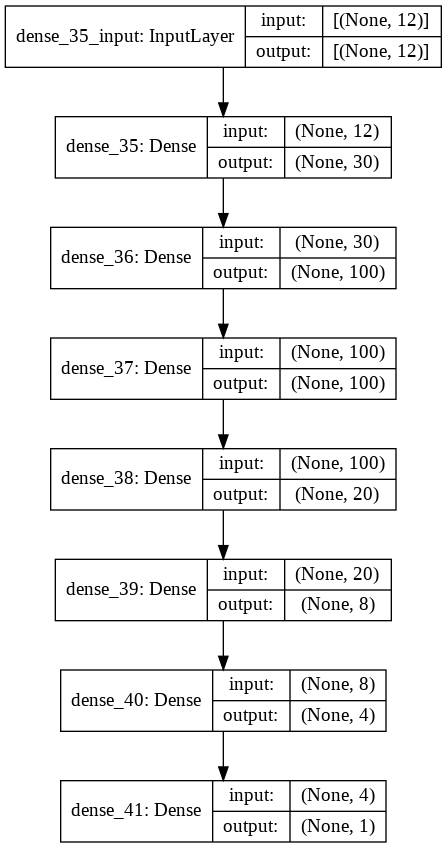

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

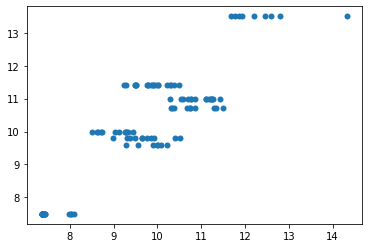

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test,marker='o',linewidths=0.0002)

In [ ]:
tf.keras.metrics.mae(y_test,y_pred)

<tf.Tensor: shape=(104,), dtype=float32, numpy=
array([0.63, 0.68, 0.88, 2.13, 0.31, 0.49, 0.11, 0.06, 0.11, 0.11, 0.82,
       0.1 , 1.39, 0.13, 0.32, 0.23, 0.39, 1.27, 1.91, 0.52, 1.29, 0.15,
       0.15, 0.81, 0.12, 1.57, 1.39, 2.16, 0.74, 0.6 , 0.05, 1.82, 0.41,
       1.37, 0.53, 0.13, 0.1 , 0.47, 1.92, 0.73, 0.23, 1.5 , 0.13, 0.1 ,
       1.03, 0.02, 0.98, 0.07, 0.13, 0.13, 0.23, 0.31, 0.26, 1.17, 0.56,
       0.4 , 1.89, 1.51, 1.04, 0.33, 0.63, 1.49, 1.65, 0.72, 1.11, 0.13,
       0.04, 0.13, 0.18, 0.6 , 1.62, 0.24, 0.8 , 0.07, 0.72, 1.89, 0.36,
       0.12, 1.55, 0.91, 0.39, 1.64, 0.15, 0.12, 0.05, 1.72, 0.16, 0.43,
       0.92, 0.48, 1.39, 1.3 , 0.59, 0.46, 1.46, 1.09, 0.71, 0.7 , 1.61,
       0.24, 0.43, 0.31, 0.05, 0.08], dtype=float32)>

In [ ]:
tf.keras.metrics.mse(y_test,y_pred)

<tf.Tensor: shape=(104,), dtype=float32, numpy=
array([3.92e-01, 4.66e-01, 7.78e-01, 4.53e+00, 9.36e-02, 2.40e-01,
       1.28e-02, 3.07e-03, 1.31e-02, 1.31e-02, 6.66e-01, 1.02e-02,
       1.93e+00, 1.60e-02, 1.03e-01, 5.34e-02, 1.55e-01, 1.61e+00,
       3.64e+00, 2.71e-01, 1.66e+00, 2.19e-02, 2.26e-02, 6.59e-01,
       1.34e-02, 2.46e+00, 1.92e+00, 4.65e+00, 5.44e-01, 3.66e-01,
       2.74e-03, 3.32e+00, 1.72e-01, 1.86e+00, 2.79e-01, 1.60e-02,
       1.05e-02, 2.24e-01, 3.69e+00, 5.30e-01, 5.12e-02, 2.24e+00,
       1.58e-02, 9.33e-03, 1.06e+00, 5.31e-04, 9.53e-01, 4.51e-03,
       1.76e-02, 1.73e-02, 5.26e-02, 9.48e-02, 6.74e-02, 1.37e+00,
       3.17e-01, 1.61e-01, 3.57e+00, 2.28e+00, 1.09e+00, 1.10e-01,
       3.97e-01, 2.22e+00, 2.72e+00, 5.19e-01, 1.23e+00, 1.59e-02,
       1.91e-03, 1.65e-02, 3.26e-02, 3.61e-01, 2.64e+00, 5.85e-02,
       6.33e-01, 4.63e-03, 5.17e-01, 3.59e+00, 1.28e-01, 1.55e-02,
       2.40e+00, 8.28e-01, 1.54e-01, 2.68e+00, 2.26e-02, 1.39e-02,
       2.72e-0

In [ ]:
y_test.shape  # If we want a single value MAE or MSE,  squeex the dimentions

(104, 1)

In [ ]:
tf.keras.metrics.mae(tf.squeeze(y_pred),tf.squeeze(y_test))

<tf.Tensor: shape=(), dtype=float64, numpy=0.697888270708231>